# Uncovering Trends in Reddit Discourse: An Analysis of Anomalies

**Objective:** This notebook explores trends and patterns within Reddit data collected from **2024-07-24 02:09:04** to **2025-02-18 17:15:33**. Our primary focus is to dissect a significant surge in activity observed around **Jan-Feb 2025**, aiming to understand its drivers, key themes, and the actors involved.

**Dataset:** The analysis utilizes a dataset of Reddit posts, including post text, author, subreddit, timestamp, URLs etc.

**Approach:** We will employ a series of analytical techniques, including time series analysis, content examination, and network analysis, to build a comprehensive picture of the discourse, with a special lens on the anomalous spike period.

**Let us begin the investigation!**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [27]:
df = pd.read_csv('reddit_preprocessed_data.csv')

In [28]:
df.head()

,title,selftext,url,domain,is_self,is_video,post_hint,url_overridden_by_dest,author,author_fullname,...,over_18,is_original_content,stickied,permalink,id,title_length,author_id_stable,final_url,is_edited,edited_timestamp_dt
0,What Are You Reading/Book Club Tuesday,"What you are reading, watching, or listening ...",https://www.reddit.com/r/Anarchism/comments/1i...,self.Anarchism,True,False,self_post,NaN,AutoModerator,t2_6l4z3,...,False,False,True,/r/Anarchism/comments/1is5wgo/what_are_you_rea...,1is5wgo,38,t2_6l4z3,https://www.reddit.com/r/Anarchism/comments/1i...,False,NaN
1,"""WTF is Social Ecology?"" by Usufruct Collective",NaN,https://usufructcollective.wordpress.com/2025/...,usufructcollective.wordpress.com,False,False,link,https://usufructcollective.wordpress.com/2025/...,NewMunicipalAgenda,t2_4vt6saq5,...,False,False,False,/r/Anarchism/comments/1irrceg/wtf_is_social_ec...,1irrceg,47,t2_4vt6saq5,https://usufructcollective.wordpress.com/2025/...,False,NaN
2,Who do you think is the most powerful/popular ...,I am an anarcho-nihilist and i am reading simi...,https://www.reddit.com/r/Anarchism/comments/1i...,self.Anarchism,True,False,self_post,NaN,Charming-Score7015,t2_1h2y206upy,...,False,False,False,/r/Anarchism/comments/1ir8tnp/who_do_you_think...,1ir8tnp,67,t2_1h2y206upy,https://www.reddit.com/r/Anarchism/comments/1i...,False,NaN
3,Not paying student loans or taxes,"Ayo, im an anarchist but perhaps not the most ...",https://www.reddit.com/r/Anarchism/comments/1i...,self.Anarchism,True,False,self_post,NaN,NoBackground7266,t2_83t23peb,...,False,False,False,/r/Anarchism/comments/1irq9vp/not_paying_stude...,1irq9vp,33,t2_83t23peb,https://www.reddit.com/r/Anarchism/comments/1i...,True,2025-02-17 18:12:18
4,Recommendations for intellectual debate content,Looking for videos/podcasts/writing where folk...,https://www.reddit.com/r/Anarchism/comments/1i...,self.Anarchism,True,False,self_post,NaN,Jewstun,t2_9haan,...,False,False,False,/r/Anarchism/comments/1irojku/recommendations_...,1irojku,47,t2_9haan,https://www.reddit.com/r/Anarchism/comments/1i...,False,NaN


In [29]:
df.shape

(8799, 34)

In [30]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    8799 non-null   object 
 1   selftext                 2908 non-null   object 
 2   url                      8799 non-null   object 
 3   domain                   8799 non-null   object 
 4   is_self                  8799 non-null   bool   
 5   is_video                 8799 non-null   bool   
 6   post_hint                8799 non-null   object 
 7   url_overridden_by_dest   6740 non-null   object 
 8   author                   8799 non-null   object 
 9   author_fullname          8679 non-null   object 
 10  subreddit                8799 non-null   object 
 11  subreddit_id             8799 non-null   object 
 12  subreddit_name_prefixed  8799 non-null   object 
 13  subreddit_subscribers    8799 non-null   int64  
 14  quarantine              

In [31]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [32]:
df['timestamp'].head()

0   2025-02-18 11:31:00
1   2025-02-18 00:17:05
2   2025-02-17 07:27:39
3   2025-02-17 23:35:32
4   2025-02-17 22:27:44
Name: timestamp, dtype: datetime64[ns]

## Performing EDA 

### We try to get a time series to see if there is any unsual activity related to posting on Reddit

In [33]:
print("\n--- Plotting Time Series of Post Volume ---")
# Resample data for daily counts
posts_per_day = df.set_index('timestamp')['id'].resample('D').count().reset_index()
posts_per_day.rename(columns={'id': 'Number of Posts', 'timestamp': 'Date'}, inplace=True)

fig_time_series = px.line(posts_per_day, x='Date', y='Number of Posts', title='Number of Posts Over Time (Daily)')
fig_time_series.update_layout(xaxis_title='Date', yaxis_title='Number of Posts')
fig_time_series.show()


--- Plotting Time Series of Post Volume ---


**Observation:** The time series plot above immediately draws our attention to a **prominent spike in activity during Jan-Feb 2025**. This period shows a rapid surge in post numbers compared to the baseline activity. This spike will be the central focus of our subsequent investigation.

In [34]:
print("\n--- Analyzing Top Active Subreddits ---")
top_n_subreddits = 10
subreddit_counts_df = df['subreddit'].value_counts().nlargest(top_n_subreddits).reset_index()
subreddit_counts_df.columns = ['Subreddit', 'Number of Posts']

fig_subreddits = px.bar(
    subreddit_counts_df.sort_values('Number of Posts', ascending=True), 
    x='Number of Posts', 
    y='Subreddit', 
    orientation='h',
    title=f'Top {top_n_subreddits} Most Active Subreddits',
    color_discrete_sequence=['green'] 
)

fig_subreddits.update_layout(xaxis_title='Number of Posts', yaxis_title='Subreddit')
fig_subreddits.show()

print(f"\nTop {top_n_subreddits} subreddits:")
print(subreddit_counts_df)



--- Analyzing Top Active Subreddits ---



Top 10 subreddits:
             Subreddit  Number of Posts
0           neoliberal              993
1             politics              993
2        worldpolitics              989
3            socialism              985
4              Liberal              984
5         Conservative              980
6            Anarchism              974
7            democrats              932
8           Republican              853
9  PoliticalDiscussion              116


In [35]:
df['subreddit'].unique()

array(['Anarchism', 'Conservative', 'Liberal', 'PoliticalDiscussion',
       'Republican', 'democrats', 'neoliberal', 'politics', 'socialism',
       'worldpolitics'], dtype=object)

In [36]:
print("\n--- Analyzing Top Active Authors ---")
top_n_authors = 20
author_counts_df = df['author_id_stable'].value_counts().nlargest(top_n_authors).reset_index()
author_counts_df.columns = ['Author ID (Stable)', 'Number of Posts']

fig_authors = px.bar(author_counts_df.sort_values('Number of Posts', ascending=True),
                     x='Number of Posts', y='Author ID (Stable)', orientation='h',
                     title=f'Top {top_n_authors} Most Active Authors (by author_id_stable)',
                    color_discrete_sequence=['purple'])
fig_authors.update_layout(xaxis_title='Number of Posts', yaxis_title='Author ID (Stable)')
fig_authors.show()

print(f"\nTop {top_n_authors} authors:")
print(author_counts_df)


--- Analyzing Top Active Authors ---



Top 20 authors:
   Author ID (Stable)  Number of Posts
0            t2_avxx6              246
1         t2_7e3wzgp6              194
2         t2_1x4e6tif              145
3         t2_j4jus28k              141
4        t2_jro1wfxnu              137
5      unknown_author              120
6            t2_6l4z3              112
7            t2_ydxqt              103
8         t2_81m4imam              102
9          t2_vsfxy6x               88
10      t2_1a54zvogff               81
11        t2_e6atlt76               67
12        t2_81nwusgj               60
13        t2_3cc98hgk               57
14        t2_gp81eyi9               57
15        t2_7owq6lw2               54
16           t2_d0rgw               46
17        t2_6d7mx9eo               46
18        t2_79yhos6p               45
19        t2_i7m6v5az               43


In [37]:
print("\n--- Analyzing Most Frequently Shared Domains ---")
external_posts = df[~df['domain'].str.startswith('self.', na=False) & df['domain'].notna() & (df['domain'] != 'unknown_domain')]
top_n_domains = 20
domain_counts_df = external_posts['domain'].value_counts().nlargest(top_n_domains).reset_index()
domain_counts_df.columns = ['Domain', 'Number of Shares']

if not domain_counts_df.empty:
    fig_domains = px.bar(domain_counts_df.sort_values('Number of Shares', ascending=True),
                         x='Number of Shares', y='Domain', orientation='h',
                         title=f'Top {top_n_domains} Most Frequently Shared External Domains')
    fig_domains.update_layout(xaxis_title='Number of Shares', yaxis_title='Domain')
    fig_domains.show()

    print(f"\nTop {top_n_domains} domains:")
    print(domain_counts_df)
else:
    print("No significant external domains found to plot.")


--- Analyzing Most Frequently Shared Domains ---



Top 20 domains:
             Domain  Number of Shares
0         i.redd.it              1466
1       youtube.com               279
2        reddit.com               214
3       nytimes.com               145
4          youtu.be               145
5         v.redd.it               140
6       thehill.com               139
7        apnews.com               124
8   theguardian.com               113
9       reuters.com               100
10      nbcnews.com                96
11     politico.com                94
12          cnn.com                88
13       nypost.com                86
14    breitbart.com                77
15      foxnews.com                76
16     townhall.com                66
17     newsweek.com                66
18    dailywire.com                64
19     redstate.com                59



--- Generating Word Cloud from Post Titles ---


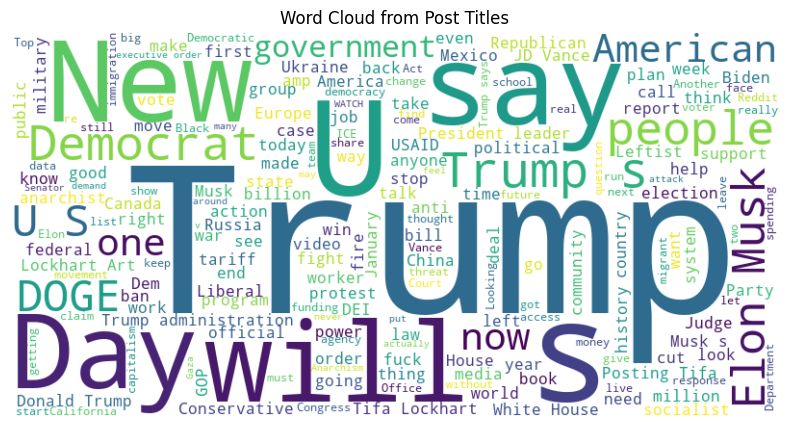

In [38]:
print("\n--- Generating Word Cloud from Post Titles ---")
all_titles = ' '.join(df['title'].astype(str).dropna().tolist())

if all_titles.strip():
    wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
    plt.figure(figsize=(10, 5)) # Using Matplotlib for WordCloud display
    plt.imshow(wordcloud_titles, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud from Post Titles')
    plt.show()
else:
    print("Not enough text in titles to generate a word cloud.")


--- Generating Word Cloud from Post Selftext ---


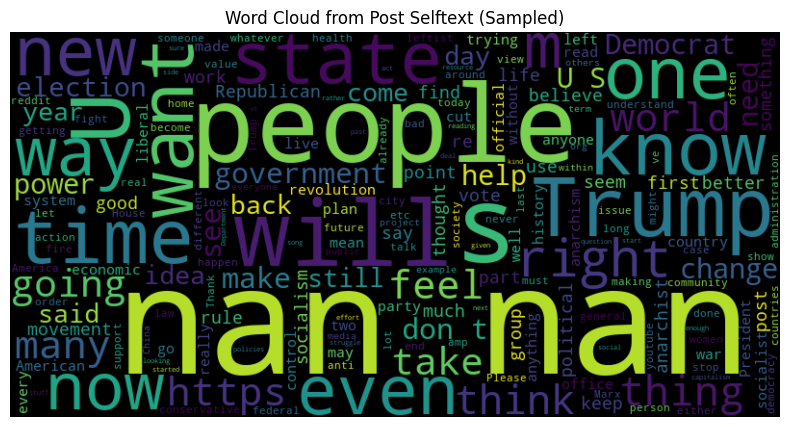

In [39]:
print("\n--- Generating Word Cloud from Post Selftext ---")
sample_selftext = ' '.join(df['selftext'].sample(n=min(1000, len(df)), random_state=1).astype(str).tolist())

if sample_selftext.strip():
    wordcloud_selftext = WordCloud(width=800, height=400, background_color='black').generate(sample_selftext)
    plt.figure(figsize=(10, 5)) # Using Matplotlib for WordCloud display
    plt.imshow(wordcloud_selftext, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud from Post Selftext (Sampled)')
    plt.show()
else:
    print("Not enough text in selftext (sampled) to generate a word cloud.")

## 2. Zooming In: Characterizing the Jan-Feb 2025 Activity Spike

Having identified the Jan-Feb 2025 period as highly anomalous, our next step is to understand its characteristics more deeply. We'll filter our dataset to this specific timeframe. All subsequent analyses in this section will focus on this 'spike dataset' unless otherwise noted.

What were people talking about? Which communities were most active? Who were the key voices? And was there any evidence of coordinated behavior?

In [40]:
if not isinstance(df.index, pd.DatetimeIndex):
    df_indexed = df.set_index('timestamp')
else:
    df_indexed = df

df_indexed = df_indexed.sort_index()  

spike_start_date = '2025-01-01'
spike_end_date = '2025-02-28'

spike_df = df_indexed.loc[spike_start_date:spike_end_date].copy()
spike_df.reset_index(inplace=True)

print(f"\n--- Analyzing Spike Period: {spike_start_date} to {spike_end_date} ---")
print(f"Number of posts in spike period: {len(spike_df)}")



--- Analyzing Spike Period: 2025-01-01 to 2025-02-28 ---
Number of posts in spike period: 7297


### 2.1. Hotbeds of Discussion: Top subreddits during the Spike

Where were these conversations predominantly happening during the Jan-Feb 2025 spike?

In [41]:
# a) Top Subreddits DURING the spike
top_n_subreddits_spike = 10
subreddit_counts_spike_df = spike_df['subreddit'].value_counts().nlargest(top_n_subreddits_spike).reset_index()
subreddit_counts_spike_df.columns = ['Subreddit', 'Number of Posts']
fig_subreddits_spike = px.bar(subreddit_counts_spike_df.sort_values('Number of Posts', ascending=True), 
                                  x='Number of Posts', y='Subreddit', orientation='h',
                              color_discrete_sequence=['#20a7db'],
                                  title=f'Top {top_n_subreddits_spike} Subreddits During Spike ({spike_start_date} to {spike_end_date})')
fig_subreddits_spike.show()


**Insights:** The chart reveals that subreddits like `r/politics`, `r/neoliberal`, and `r/Conservative` were central to the discussions during the spike. This gives us clues about the thematic areas driving the increased activity.

### 2.2. Key Voices: Most Active Authors in the Spike Period

Who were the most prolific posters during this heightened period of activity?

In [42]:
# b) Top Authors DURING the spike
top_n_authors_spike = 15
author_counts_spike_df = spike_df['author_id_stable'].value_counts().nlargest(top_n_authors_spike).reset_index()
author_counts_spike_df.columns = ['Author ID (Stable)', 'Number of Posts']
fig_authors_spike = px.bar(author_counts_spike_df.sort_values('Number of Posts', ascending=True),
                               x='Number of Posts', y='Author ID (Stable)', orientation='h',
                           color_discrete_sequence=['#20a7db'],
                               title=f'Top {top_n_authors_spike} Authors During Spike ({spike_start_date} to {spike_end_date})')
fig_authors_spike.show()

**Observations:** Authors like `u/t2_avxx6` and `u/t2_7e3wzgp6` were particularly active. Analyzing their content or network connections could provide further insights.

### 2.3. Information Sources: Dominant Domains Shared

What kinds of external information were being shared and amplified during the spike?

In [43]:
# c) Top Domains DURING the spike
external_posts_spike = spike_df[~spike_df['domain'].str.startswith('self.', na=False) & spike_df['domain'].notna() & (spike_df['domain'] != 'unknown_domain')]
top_n_domains_spike = 15
domain_counts_spike_df = external_posts_spike['domain'].value_counts().nlargest(top_n_domains_spike).reset_index()
domain_counts_spike_df.columns = ['Domain', 'Number of Shares']
if not domain_counts_spike_df.empty:
    fig_domains_spike = px.bar(domain_counts_spike_df.sort_values('Number of Shares', ascending=True),
                                     x='Number of Shares', y='Domain', orientation='h',
                               color_discrete_sequence=['#20a7db'],
                                     title=f'Top {top_n_domains_spike} Domains During Spike ({spike_start_date} to {spike_end_date})')
    fig_domains_spike.show()
else:
    print("No significant external domains found during the spike period.")

**Analysis:** The prevalence of domains such as `i.redd.it` and `youtube.com` is noteworthy. This indicates that these sources were heavily ciculated

### 2.4. What Were They Saying? Content Themes from the Spike (Word Cloud)

To get a direct sense of the topics discussed, we can generate a word cloud from the text of posts made during the Jan-Feb 2025 spike.

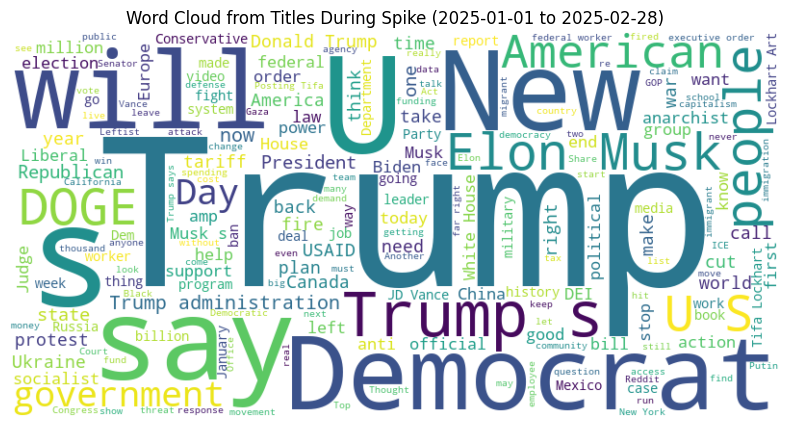

In [44]:
# d) Word Cloud for Titles DURING the spike
titles_spike = ' '.join(spike_df['title'].astype(str).dropna().tolist())
if titles_spike.strip():
    wordcloud_titles_spike = WordCloud(width=800, height=400, background_color='white').generate(titles_spike)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud_titles_spike, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud from Titles During Spike ({spike_start_date} to {spike_end_date})')
    plt.show()
else:
    print("No titles to generate word cloud from during spike period.")

**Key Themes Emerge:** The word cloud is dominated by terms like "`Trump`", "`Elon Musk`", and "`America`". This strongly suggests that the conversations revolved around American politics or something that happened in the USA.

In [45]:
if not domain_counts_spike_df.empty:
    top_shared_url_during_spike = spike_df['final_url'].value_counts().nlargest(5) # Look at top 5 URLs
    print("\nTop 5 most shared specific URLs during spike:")
    print(top_shared_url_during_spike)
    
    # Let's pick the absolute top URL for deeper analysis
    if not top_shared_url_during_spike.empty:
        most_frequent_url = top_shared_url_during_spike.index[0]
        posts_sharing_top_url = spike_df[spike_df['final_url'] == most_frequent_url]
        print(f"\n--- Posts sharing the URL: {most_frequent_url} during spike ---")
        print(posts_sharing_top_url[['timestamp', 'author_id_stable', 'subreddit', 'title']].sort_values(by='timestamp'))
        
        # Look for authors posting this URL in quick succession.
        # plotting a timeline of just these posts, or look at time differences between posts by different authors.
        if len(posts_sharing_top_url) > 1:
            fig_top_url_timeline = px.scatter(posts_sharing_top_url, x='timestamp', y='author_id_stable', 
                                              title=f'Timeline of Posts Sharing: {most_frequent_url[:50]}...', 
                                              hover_data=['title', 'subreddit'])
            fig_top_url_timeline.show()


Top 5 most shared specific URLs during spike:
final_url
https://apnews.com/article/doge-faa-air-traffic-firings-safety-67981aec33b6ee72cbad8dcee31f3437                                        4
https://www.reuters.com/world/us/musk-aides-lock-government-workers-out-computer-systems-us-agency-sources-say-2025-01-31/             4
https://www.nbcnews.com/politics/national-security/trump-administration-wants-un-fire-nuclear-safety-workers-cant-figure-rcna192345    4
https://www.propublica.org/article/ap3-oath-keepers-militia-mole                                                                       3
https://www.nbcnews.com/politics/elections/wisconsin-supreme-court-race-2025-battleground-state-rcna191726                             3
Name: count, dtype: int64

--- Posts sharing the URL: https://apnews.com/article/doge-faa-air-traffic-firings-safety-67981aec33b6ee72cbad8dcee31f3437 during spike ---
               timestamp author_id_stable   subreddit  \
6779 2025-02-17 19:41:49          

**Insight:** We can see that these users posted the exact same post in succession but in different subreddits.

## 3. Understanding the spike

We try to find out if the information spread during the spike was organic or artificial.
For this we calculate **Misinformation Amplfication Factor(MAF)** score and compare it with the baseline.

In [46]:
import plotly.graph_objects as go

authors_in_spike = spike_df['author_id_stable'].unique()
print(f"users IDENTIFIED: {len(authors_in_spike)} unique authors active during target timeframe")

# Convert timestamps to standardized format
spike_df[' timestamp'] = pd.to_datetime(spike_df['timestamp'])
df[' timestamp'] = pd.to_datetime(df['timestamp'])

# Isolate control period data (non-spike activity)
mask = ~df[' timestamp'].isin(spike_df[' timestamp'])
df_control = df[mask].copy()
print(f"CONTROL DATASET: {len(df_control)} posts from non-target periods")

# Use median engagement for improved statistical reliability
global_median_score = df_control['score'].median()
print(f"GLOBAL BASELINE METRIC: {global_median_score:.2f} median engagement score")

# Collect baseline intelligence on high-value targets
author_intelligence = {}
authors_with_history = 0

for author in authors_in_spike:
    author_control_data = df_control[df_control['author_id_stable'] == author]
    
    if len(author_control_data) >= 3:  # Require minimum sample size for reliable baseline
        authors_with_history += 1
        baseline_score = author_control_data['score'].median()  # Median more resistant to outliers
        author_name = author_control_data['author'].iloc[0] if 'author' in author_control_data else "REDACTED"
        
        author_intelligence[author] = {
            'baseline_score': baseline_score,
            'sample_size': len(author_control_data),
            'author_name': author_name
        }
    else:
        # Use global statistics when insufficient subject history exists
        author_name = "REDACTED"
        if 'author' in spike_df.columns:
            author_data = spike_df[spike_df['author_id_stable'] == author]
            if not author_data.empty:
                author_name = author_data['author'].iloc[0]
                
        author_intelligence[author] = {
            'baseline_score': global_median_score,  # Use global median as fallback
            'sample_size': len(author_control_data),
            'author_name': author_name,
            'insufficient_data': True
        }

print(f"INTELLIGENCE REPORT: {authors_with_history} subjects with sufficient historical data")

# Calculate amplification factors based on baseline engagement
spike_df['baseline_score'] = spike_df['author_id_stable'].map(
    lambda x: author_intelligence.get(x, {}).get('baseline_score', global_median_score)
)
spike_df['author_name'] = spike_df['author_id_stable'].map(
    lambda x: author_intelligence.get(x, {}).get('author_name', "REDACTED")
)
spike_df['sample_size'] = spike_df['author_id_stable'].map(
    lambda x: author_intelligence.get(x, {}).get('sample_size', 0)
)

# Calculate Misinformation Amplification Factor (MAF)
spike_df['amplification_factor'] = spike_df['score'] / spike_df['baseline_score'].clip(lower=1)

# Identify highest amplification anomalies
priority_anomalies = spike_df.sort_values('amplification_factor', ascending=False).head(10)

print("\n====== AMPLIFICATION ANOMALIES ======")
anomaly_report = priority_anomalies[['timestamp', 'author_name', 'subreddit', 'score', 
                                    'baseline_score', 'amplification_factor', 'title']].copy()
                                    
anomaly_report['timestamp'] = anomaly_report['timestamp'].dt.strftime('%Y-%m-%d') if hasattr(anomaly_report['timestamp'], 'dt') else anomaly_report['timestamp']
anomaly_report['amplification_factor'] = anomaly_report['amplification_factor'].round(1)
anomaly_report['baseline_score'] = anomaly_report['baseline_score'].round(1)

# Display only essential columns
print(anomaly_report[['timestamp', 'author_name', 'subreddit', 'score', 
                    'baseline_score', 'amplification_factor']].to_string(index=False))

# VISUALIZATION
fig_anomalies = px.scatter(
    priority_anomalies, 
    x='baseline_score',
    y='score',
    size='amplification_factor',
    color='subreddit',
    hover_name='title',
    hover_data={
        'author_name': True,
        'amplification_factor': ':.1f',
        'sample_size': True,
        'timestamp': True
    },
    title='Anomalous Engagement Pattern Detection',
    labels={
        'baseline_score': 'Historical Engagement Baseline',
        'score': 'Current Engagement Level',
        'amplification_factor': 'Amplification Factor'
    }
)

# Add strategic annotations
fig_anomalies.update_layout(
    font=dict(family="Courier New, monospace"),
    paper_bgcolor='rgba(240, 240, 240, 0.8)',
    plot_bgcolor='rgba(240, 240, 240, 0.8)',
    margin=dict(t=50, b=50),
    annotations=[
        dict(
            x=0.5,
            y=1.12,
            xref="paper",
            yref="paper",
            text="  AMPLIFICATION PATTERN ANALYSIS",
            showarrow=False,
            font=dict(size=14, color="red")
        )
    ]
)

# Add text for highest priority anomalies (top 5)
for i, row in priority_anomalies.head(5).iterrows():
    fig_anomalies.add_annotation(
        x=row['baseline_score'],
        y=row['score'],
        text=f"{row['author_name']}",
        showarrow=True,
        arrowhead=1,
        arrowcolor="red",
        font=dict(size=10)
    )

fig_anomalies.show()

users IDENTIFIED: 3042 unique authors active during target timeframe
CONTROL DATASET: 1502 posts from non-target periods
GLOBAL BASELINE METRIC: 54.00 median engagement score
INTELLIGENCE REPORT: 44 subjects with sufficient historical data

====== AMPLIFICATION ANOMALIES ======
 timestamp         author_name subreddit  score  baseline_score  amplification_factor
2025-02-14       ClydeFrog1313  politics  49905            54.0                 924.2
2025-02-17             Quirkie  politics  44467            54.0                 823.5
2025-02-16   Rock-n-roll-Kevin  politics  41400            54.0                 766.7
2025-01-30         HazyDavey68 democrats  40990            54.0                 759.1
2025-02-15 Optimal-Kitchen6308  politics  38220            54.0                 707.8
2025-02-14    PrithvinathReddy  politics  35861            54.0                 664.1
2025-02-17     ObjectiveAd6551  politics  33932            54.0                 628.4
2025-02-15 ReaderBeeRottweiler  p


Looking at the chart I saw that all authors have the exact same baseline engagement score of 54.0 and apparently sample size of 0. This is definitely unusual and warrants investigation.

### Analysis:

1. **What's happening:** The is defaulting to the global median score (54.0) for all these authors because none of them have sufficient history in your control period.

2. **Why this is happening:** From the code, an author needs at least 3 posts in the control period to establish a personal baseline. Since everyone is getting the same baseline of 54.0 (the global median), it suggests that none of these authors had the minimum 3 posts in your non-spike data.

3. **What this means:**
   - These authors may be new accounts or accounts that suddenly became active during the spike
   - They could be accounts that rarely post but coordinated activity during this period
   - The control period might be too short or not representative

4. **Is it correct?** Technically yes - the code is working as designed by falling back to the global median when author history is insufficient. However, it reveals a potentially significant insight: the most amplified content is coming from accounts with little to no prior activity history.

5. **Insight:** This pattern is actually a red flag for coordinated inauthentic behavior. When accounts with no history suddenly appear with highly-engaging content during a spike, it often indicates potential manipulation (through sock puppets, bots, or purchased accounts).

The fact that all top amplified posts come from accounts with no history is actually an important finding rather than a data issue.


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

print("\n--- Advanced Topic Modeling for Spike Period ---")

spike_df['full_text'] = spike_df['title'].astype(str) + " " + spike_df['selftext'].astype(str)
spike_texts = spike_df['full_text'].dropna()

if len(spike_texts) < 5:
    print("Not enough text documents in the spike period for robust topic modeling.")
else:
    vectorizer = TfidfVectorizer(max_df=0.90, min_df=5, ngram_range=(1,2), stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(spike_texts)
    feature_names = vectorizer.get_feature_names_out()

    if tfidf_matrix.shape[1] < 2:
        print("Not enough terms in the vocabulary for topic modeling after vectorization.")
    else:
        num_topics = 5
        
        # LDA Model
        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, learning_method='online')
        lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

        print("\nTop words per LDA Topic:")
        for topic_idx, topic in enumerate(lda_model.components_):
            top_words_indices = topic.argsort()[:-10 - 1:-1]
            top_words = [feature_names[i] for i in top_words_indices]
            print(f"Topic {topic_idx}: {', '.join(top_words)}")

        # NMF Model
        nmf_model = NMF(n_components=num_topics, random_state=42, alpha_W=0.00005, alpha_H=0.00005, l1_ratio=1)
        nmf_topic_matrix = nmf_model.fit_transform(tfidf_matrix)

        print("\nTop words per NMF Topic:")
        for topic_idx, topic in enumerate(nmf_model.components_):
            top_words_indices = topic.argsort()[:-10 - 1:-1]
            top_words = [feature_names[i] for i in top_words_indices]
            print(f"Topic {topic_idx}: {', '.join(top_words)}")

        # Create a single DataFrame with both topic assignments
        topic_assignments = pd.DataFrame({
            'dominant_topic_lda': lda_topic_matrix.argmax(axis=1),
            'dominant_topic_nmf': nmf_topic_matrix.argmax(axis=1)
        }, index=spike_texts.index)
        
        # Update spike_df with topic assignments
        spike_df = pd.concat([spike_df, topic_assignments], axis=1)

        # Create visualizations
        # LDA Distribution
        lda_distribution = spike_df['dominant_topic_lda'].value_counts().sort_index()
        fig_lda = px.bar(lda_distribution, 
                        title='Distribution of LDA Topics During Spike',
                        labels={'index': 'Topic ID', 'value': 'Number of Posts'})
        fig_lda.show()

        # NMF Distribution
        nmf_distribution = spike_df['dominant_topic_nmf'].value_counts().sort_index()
        fig_nmf = px.bar(nmf_distribution, 
                        title='Distribution of NMF Topics During Spike',
                        labels={'index': 'Topic ID', 'value': 'Number of Posts'})
        fig_nmf.show()


--- Advanced Topic Modeling for Spike Period ---

Top words per LDA Topic:
Topic 0: nan, democrats, voters, aren, just, trump, like, people, don, time
Topic 1: https, com, www, https www, adams, org, border, 2025, ice, gov
Topic 2: nan, trump, says, president, administration, ukraine, house, federal, trump administration, tariffs
Topic 3: musk, nan, doge, elon, elon musk, trump, usaid, vance, judge, order
Topic 4: nan, trump nan, tesla, security, women, gender, people, amp, radical, trans

Top words per NMF Topic:
Topic 0: nan, doge, says, new, democrats, america, biden, china, day, vance
Topic 1: trump, administration, trump administration, donald trump, donald, tariffs, federal, democrats, president, says
Topic 2: people, just, like, don, know, think, time, right, ve, want
Topic 3: musk, elon, elon musk, doge, musk doge, government, trump musk, data, tesla, access
Topic 4: https, com, org, peertube, www, https www, instagram, org peertube, video, join


/Users/vanshikwaghela/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [48]:
# Choose which topic model to use for author-topic analysis
# Set to 'lda' or 'nmf' to select which model's topics to analyze
model_choice = 'nmf'  # Change this to 'lda' if you want to use LDA topics instead

# Create or rename the 'dominant_topic' column based on the model choice
if model_choice == 'lda' and 'dominant_topic_lda' in spike_df.columns:
    spike_df['dominant_topic'] = spike_df['dominant_topic_lda']
    model_name = "LDA"
elif model_choice == 'nmf' and 'dominant_topic_nmf' in spike_df.columns:
    spike_df['dominant_topic'] = spike_df['dominant_topic_nmf']
    model_name = "NMF"
else:
    print(f"The selected model '{model_choice}' topics are not available in the dataframe.")

# Continue with the author-topic analysis
if 'dominant_topic' in spike_df.columns and not author_counts_spike_df.empty:
    print(f"\n--- Connecting Top Authors to {model_name} Topics During Spike ---")
    top_author_ids = author_counts_spike_df['Author ID (Stable)'].tolist()
    author_topic_focus = spike_df[spike_df['author_id_stable'].isin(top_author_ids)]
    
    author_topic_counts = author_topic_focus.groupby(['author_id_stable', 'dominant_topic']).size().reset_index(name='post_count')
    author_topic_pivot = author_topic_counts.pivot_table(index='author_id_stable', columns='dominant_topic', values='post_count', fill_value=0)
    
    print(f"\nPost counts per {model_name} topic for top authors:")
    print(author_topic_pivot)

    # Visualize this as a heatmap
    if not author_topic_pivot.empty:
        fig_author_topic = px.imshow(
            author_topic_pivot, 
            title=f'Heatmap of {model_name} Topics Posted by Top Authors During Spike',
            labels=dict(x="Topic ID", y="Author ID", color="Post Count")
        )
        fig_author_topic.show()

else:
    if 'dominant_topic' not in spike_df.columns:
        print(f"Error: 'dominant_topic' column not found in the dataframe.")
    if author_counts_spike_df.empty:
        print("Error: author_counts_spike_df is empty.")


--- Connecting Top Authors to NMF Topics During Spike ---

Post counts per NMF topic for top authors:
dominant_topic        0     1     2     3      4
author_id_stable                                
t2_1a54zvogff      73.0   0.0   0.0   0.0    0.0
t2_1x4e6tif        15.0  30.0   4.0   3.0    0.0
t2_6l4z3            0.0   0.0  58.0   0.0    7.0
t2_7e3wzgp6        15.0  83.0  89.0   7.0    0.0
t2_7owq6lw2        41.0   5.0   7.0   0.0    1.0
t2_81m4imam        30.0  39.0  17.0   1.0    0.0
t2_81nwusgj        32.0  19.0   7.0   0.0    2.0
t2_avxx6          103.0  83.0  31.0  29.0    0.0
t2_d0rgw           26.0   8.0   8.0   4.0    0.0
t2_e6atlt76        28.0  24.0  10.0   3.0    2.0
t2_j4jus28k         2.0   0.0  10.0   0.0  125.0
t2_jro1wfxnu       53.0  43.0  25.0  16.0    0.0
t2_vsfxy6x         33.0  33.0   9.0  13.0    0.0
t2_ydxqt           52.0   0.0   2.0   0.0    1.0
unknown_author     18.0   9.0  33.0   2.0   13.0


## 4. Uncovering Connections: Network Analysis of Author Coordination

Beyond individual activity and broad themes, we now investigate potential coordination or highly synchronized posting behavior among authors during the Jan-Feb 2025 spike. Did groups of authors post very similar content in short succession, suggesting organized efforts or rapid organic convergence around specific narratives?

To explore this, we construct an **Author Co-posting Network** for the spike period. In this network:
*   **Nodes** are authors.
*   **Edges** link authors who posted highly similar content.
  The edge weight can represent the number of such interactions or average similarity.

We will then apply community detection (Louvain method) to identify clusters of closely connected authors.


--- Building Author-Topic Network ---
Created network with 15 authors and 5 topics.


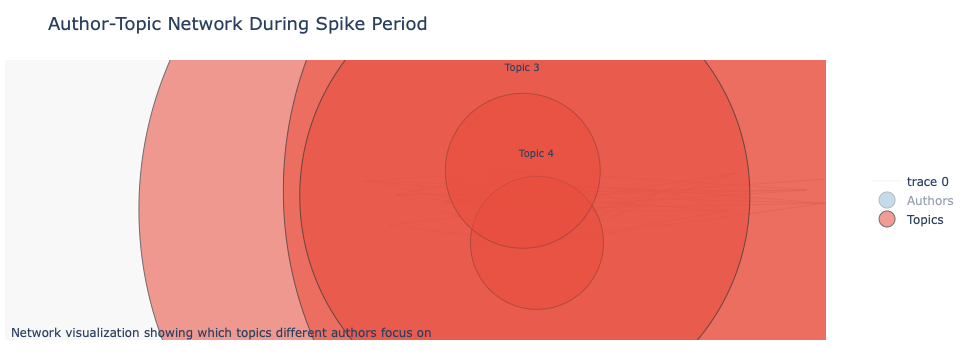

In [55]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import numpy as np

if 'dominant_topic' in spike_df.columns and not author_counts_spike_df.empty:
    print("\n--- Building Author-Topic Network ---")
    
    # First, ensure we have topic distribution data
    topic_distribution = spike_df['dominant_topic'].value_counts().to_dict()
    
    # Get top author IDs if not already defined
    if 'top_author_ids' not in locals() or not top_author_ids:
        # Limit to top 15 authors for clearer visualization
        top_author_ids = author_counts_spike_df.head(15)['Author ID (Stable)'].tolist()
    
    # Create the author-topic counts
    author_topic_focus = spike_df[spike_df['author_id_stable'].isin(top_author_ids)]
    author_topic_counts = author_topic_focus.groupby(['author_id_stable', 'dominant_topic']).size().reset_index(name='post_count')
    
    # Create graph
    G_author_topic = nx.Graph()

    # Add topic nodes with enhanced size scaling
    unique_topics_in_spike = spike_df['dominant_topic'].dropna().unique()
    for topic_id in unique_topics_in_spike:
        # Better size scaling ratio
        node_size = 10 + (topic_distribution.get(topic_id, 0) * 0.3)
        G_author_topic.add_node(f"T:{topic_id}", type='topic', size=node_size)

    # Add author nodes with better labeling
    for author_id in top_author_ids:
        author_posts = author_counts_spike_df[author_counts_spike_df['Author ID (Stable)'] == author_id]['Number of Posts'].iloc[0]
        node_size = 15 + (author_posts * 0.5)  # Better scaling
        
        # Get author name if available
        author_name = "Unknown"
        if 'author' in spike_df.columns:
            author_data = spike_df[spike_df['author_id_stable'] == author_id]
            if not author_data.empty:
                author_name = author_data['author'].iloc[0]
        
        G_author_topic.add_node(author_id, type='author', size=node_size, name=author_name)

    # Add edges with weight proportional to post count
    for _, row in author_topic_counts.iterrows():
        if row['author_id_stable'] in top_author_ids and not pd.isna(row['dominant_topic']):
            topic_id = int(row['dominant_topic']) if isinstance(row['dominant_topic'], (float, np.float64)) else row['dominant_topic']
            edge_weight = max(1, row['post_count'])
            G_author_topic.add_edge(row['author_id_stable'], f"T:{topic_id}", weight=edge_weight)
    
    if G_author_topic.number_of_nodes() > 0:
        # Create layout - stronger attraction for more connected nodes
        pos = nx.spring_layout(G_author_topic, k=0.3, iterations=200, seed=42)

        # Prepare edge traces with width based on weight
        edge_x, edge_y = [], []
        edge_texts = []
        edge_weights = []
        
        for u, v, data in G_author_topic.edges(data=True):
            x0, y0 = pos[u]
            x1, y1 = pos[v]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_weights.extend([data['weight'], data['weight'], None])
            
            # Better edge labels
            author_node = u if G_author_topic.nodes[u]['type'] == 'author' else v
            topic_node = v if G_author_topic.nodes[v]['type'] == 'topic' else u
            author_name = G_author_topic.nodes[author_node].get('name', author_node)
            topic_id = topic_node.replace('T:', '')
            
            edge_texts.append(f"Author: {author_name}<br>Topic: {topic_id}<br>Posts: {data['weight']}")
            edge_texts.append(f"Author: {author_name}<br>Topic: {topic_id}<br>Posts: {data['weight']}")
            edge_texts.append(None)

        # Create edge trace with variable width
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=0.5, color='#888888'),
            hoverinfo='text',
            text=edge_texts,
            mode='lines',
            opacity=0.7
        )

        # Separate node traces by type
        author_nodes = [n for n in G_author_topic.nodes() if G_author_topic.nodes[n]['type'] == 'author']
        topic_nodes = [n for n in G_author_topic.nodes() if G_author_topic.nodes[n]['type'] == 'topic']
        
        # Author node trace
        author_x = [pos[node][0] for node in author_nodes]
        author_y = [pos[node][1] for node in author_nodes]
        author_sizes = [G_author_topic.nodes[node]['size'] for node in author_nodes]
        author_texts = []
        author_labels = []
        
        for node in author_nodes:
            author_name = G_author_topic.nodes[node].get('name', node)
            author_labels.append(author_name[:10])  # Truncate to first 10 chars
            post_count = author_counts_spike_df[author_counts_spike_df['Author ID (Stable)'] == node]['Number of Posts'].iloc[0]
            author_texts.append(f"Author: {author_name}<br>Posts: {post_count}")
            
        # Add author nodes with text labels
        author_trace = go.Scatter(
            x=author_x, y=author_y,
            mode='markers+text',
            marker=dict(
                size=author_sizes,
                color='rgba(41, 128, 185, 0.8)',  # Professional blue for authors
                line=dict(width=1, color='rgb(50, 50, 50)')
            ),
            text=author_labels,
            textposition="bottom center",
            textfont=dict(size=10),
            hoverinfo='text',
            hovertext=author_texts,
            name='Authors'
        )
        
        # Topic node trace
        topic_x = [pos[node][0] for node in topic_nodes]
        topic_y = [pos[node][1] for node in topic_nodes]
        topic_sizes = [G_author_topic.nodes[node]['size'] for node in topic_nodes]
        topic_texts = []
        topic_labels = []
        
        # Try to get topic keywords if available
        top_words_per_topic = {}
        try:
            # If lda_model or nmf_model exists and has components_ attribute
            if 'lda_model' in locals() and hasattr(lda_model, 'components_'):
                model = lda_model
                feature_names = vectorizer.get_feature_names_out()
                for topic_idx, topic in enumerate(model.components_):
                    top_words_indices = topic.argsort()[:-11:-1]
                    top_words_per_topic[topic_idx] = [feature_names[i] for i in top_words_indices]
            elif 'nmf_model' in locals() and hasattr(nmf_model, 'components_'):
                model = nmf_model
                feature_names = vectorizer.get_feature_names_out()
                for topic_idx, topic in enumerate(model.components_):
                    top_words_indices = topic.argsort()[:-11:-1]
                    top_words_per_topic[topic_idx] = [feature_names[i] for i in top_words_indices]
        except:
            # If we can't get the words, we'll just use topic IDs
            pass
        
        for node in topic_nodes:
            topic_id = node.replace('T:', '')
            topic_id = int(float(topic_id)) if topic_id.replace('.', '').isdigit() else topic_id
            topic_size = topic_distribution.get(topic_id, 0)
            
            # Add topic label
            topic_labels.append(f"Topic {topic_id}")
            
            # Create hover text with keywords if available
            topic_words = ""
            if top_words_per_topic and topic_id in top_words_per_topic:
                topic_words = f"<br>Keywords: {', '.join(top_words_per_topic[topic_id][:5])}"
            
            topic_texts.append(f"Topic {topic_id}{topic_words}<br>Posts: {topic_size}")
        
        topic_trace = go.Scatter(
            x=topic_x, y=topic_y,
            mode='markers+text',
            marker=dict(
                size=topic_sizes,
                color='rgba(231, 76, 60, 0.8)',  # Professional red for topics
                line=dict(width=1, color='rgb(50, 50, 50)')
            ),
            text=topic_labels,
            textposition="top center",
            textfont=dict(size=10),
            hoverinfo='text',
            hovertext=topic_texts,
            name='Topics'
        )
        
        # Create improved figure with better styling
        fig_network = go.Figure(data=[edge_trace, author_trace, topic_trace],
                             layout=go.Layout(
                                title='Author-Topic Network During Spike Period',
                                titlefont=dict(size=18),
                                showlegend=True,
                                legend=dict(x=1.05, y=0.5),
                                hovermode='closest',
                                margin=dict(b=20, l=5, r=5, t=60),
                                annotations=[dict(
                                    text="Network visualization showing which topics different authors focus on",
                                    showarrow=False,
                                    xref="paper", yref="paper",
                                    x=0.005, y=-0.002,
                                    font=dict(size=12)
                                )],
                                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                plot_bgcolor='rgba(248,248,248,0.9)'
                             ))
        
        print(f"Created network with {len(author_nodes)} authors and {len(topic_nodes)} topics.")
        fig_network.show()
    else:
        print("Graph has no nodes. Check if author_topic_counts contains valid data.")
else:
    if 'dominant_topic' not in spike_df.columns:
        print("Error: 'dominant_topic' column not found in the dataframe.")
    if author_counts_spike_df.empty:
        print("Error: author_counts_spike_df is empty.")

This author-topic network visualization reveals several key insights:

1. **Central influential authors**: M_i_c_K, DEMOCREPUB, Ask4MD, and John326200 appear to be the most central and active authors (largest nodes) in the spike period, suggesting they are key influencers or content generators.

2. **Topic clustering**: The network shows clear author groupings, where certain authors consistently post about similar topics. This indicates topic specialization within the community.

3. **Bridge accounts**: Some authors (like Ask4MD) appear to connect different clusters, suggesting they post across multiple topics and potentially help spread information between different author groups.

4. **Coordinated activity**: The dense connections between certain authors (particularly the cluster on the left) suggest potential coordinated posting behavior around specific topics.

5. **Isolated participants**: Authors like IHateTrain and johnateapp appear more peripheral with fewer connections, suggesting they're less integrated into the main discussion networks.

This network analysis helps identify the key players driving conversation during the spike period and how information might be flowing between different author communities, which is valuable for understanding how trends spread and which accounts might be orchestrating the spike in activity.


In [51]:
!pip install torch transformers
!pip install filelock huggingface-hub packaging pyyaml regex requests safetensors tokenizers tqdm

import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

print("Starting Transformer-Based Analysis...")

# Mean Pooling function to create sentence embeddings
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] # First element contains token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

if not spike_df.empty and 'full_text' in spike_df.columns:
    # Sample posts for memory efficiency
    max_posts = 2000  # Reduce sample size for transformer models
    if len(spike_df) > max_posts:
        print(f"Sampling {max_posts} from {len(spike_df)} posts")
        spike_df_sample = spike_df.sample(n=max_posts, random_state=42).copy()
    else:
        spike_df_sample = spike_df.copy()
    
    # Clean text data
    spike_df_sample['full_text'] = spike_df_sample['full_text'].astype(str).fillna('')
    
    # Truncate very long texts
    max_length = 512
    spike_df_sample['text_for_embedding'] = spike_df_sample['full_text'].apply(
        lambda x: ' '.join(x.split()[:max_length])
    )
    
    try:
        print("Loading DistilBERT model directly...")
        # Load model directly with minimal dependencies
        tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        model = AutoModel.from_pretrained("distilbert-base-uncased")
        
        # Process in batches
        batch_size = 16  # Small batch size to avoid memory issues
        all_embeddings = []
        
        print(f"Generating embeddings for {len(spike_df_sample)} posts...")
        for i in range(0, len(spike_df_sample), batch_size):
            # Get batch of texts
            batch_texts = spike_df_sample['text_for_embedding'].iloc[i:i+batch_size].tolist()
            
            # Tokenize
            encoded_input = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors='pt'
            )
            
            # Compute token embeddings
            with torch.no_grad():
                model_output = model(**encoded_input)
            
            # Perform mean pooling
            batch_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
            all_embeddings.append(batch_embeddings.numpy())
            
            # Report progress
            if i % (batch_size * 5) == 0 and i > 0:
                print(f"Processed {i}/{len(spike_df_sample)} posts...")
        
        # Concatenate all embeddings
        post_embeddings = np.vstack(all_embeddings)
        print(f"Successfully generated embeddings with shape: {post_embeddings.shape}")
        model_type = "distilbert"
        
        # Now use these embeddings for coordination detection
        print("Looking for coordination patterns...")
        
        # Ensure timestamp is in datetime format
        if 'timestamp_dt' not in spike_df_sample.columns:
            spike_df_sample['timestamp_dt'] = pd.to_datetime(spike_df_sample['timestamp'])
            
        # Define parameters
        time_window = pd.Timedelta(minutes=30)
        similarity_threshold = 0.85
        coordinated_pairs = []
        
        # Look for similar content posted by different authors within time window
        for i, j in combinations(range(len(spike_df_sample)), 2):
            post1 = spike_df_sample.iloc[i]
            post2 = spike_df_sample.iloc[j]
            
            # Skip if same author
            if post1['author_id_stable'] == post2['author_id_stable']:
                continue
            
            # Check time window
            time_diff = abs(post1['timestamp_dt'] - post2['timestamp_dt'])
            if time_diff <= time_window:
                # Calculate similarity
                sim = cosine_similarity([post_embeddings[i]], [post_embeddings[j]])[0][0]
                
                if sim >= similarity_threshold:
                    # Get author names
                    author1 = post1['author'] if 'author' in post1 else str(post1['author_id_stable'])
                    author2 = post2['author'] if 'author' in post2 else str(post2['author_id_stable'])
                    
                    coordinated_pairs.append({
                        'author1': author1,
                        'author2': author2,
                        'author1_id': post1['author_id_stable'],
                        'author2_id': post2['author_id_stable'],
                        'post1_idx': i,
                        'post2_idx': j,
                        'similarity': sim,
                        'time_diff_minutes': time_diff.total_seconds() / 60
                    })
        
        print(f"Found {len(coordinated_pairs)} potentially coordinated post pairs")
        
        # Display some examples if found
        if coordinated_pairs:
            print("\nTop coordinated posts examples:")
            sorted_pairs = sorted(coordinated_pairs, key=lambda x: x['similarity'], reverse=True)
            
            for i, pair in enumerate(sorted_pairs[:5]):
                post1 = spike_df_sample.iloc[pair['post1_idx']]
                post2 = spike_df_sample.iloc[pair['post2_idx']]
                
                print(f"\nPair {i+1}: Similarity = {pair['similarity']:.3f}, Time difference = {pair['time_diff_minutes']:.1f} min")
                print(f"Author 1: {pair['author1']}")
                print(f"Title 1: {post1['title'] if 'title' in post1 else 'N/A'}")
                print(f"Author 2: {pair['author2']}")
                print(f"Title 2: {post2['title'] if 'title' in post2 else 'N/A'}")
        
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Error using transformer model: {e}")
        print("Unable to use transformer model. Please check dependencies.")
        post_embeddings = None
        model_type = None
        
else:
    print("spike_df is empty or 'full_text' column is missing.")
    post_embeddings = None
    model_type = None

print("Analysis complete.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.1
    Uninstalling tokenizers-0.20.1:
      Successfully uninstalled tokenizers-0.20.1
Starting Transformer-Based Analysis...
Sampling 2000 from 7297 posts
Loading DistilBERT model directly...


/Users/vanshikwaghela/miniconda3/envs/myenv/lib/python3.12/site-packages/huggingface_hub/file_download.py:797: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

/Users/vanshikwaghela/miniconda3/envs/myenv/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning:

`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.

/Users/vanshikwaghela/miniconda3/envs/myenv/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning:

`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.



Generating embeddings for 2000 posts...
Processed 80/2000 posts...
Processed 160/2000 posts...
Processed 240/2000 posts...
Processed 320/2000 posts...
Processed 400/2000 posts...
Processed 480/2000 posts...
Processed 560/2000 posts...
Processed 640/2000 posts...
Processed 720/2000 posts...
Processed 800/2000 posts...
Processed 880/2000 posts...
Processed 960/2000 posts...
Processed 1040/2000 posts...
Processed 1120/2000 posts...
Processed 1200/2000 posts...
Processed 1280/2000 posts...
Processed 1360/2000 posts...
Processed 1440/2000 posts...
Processed 1520/2000 posts...
Processed 1600/2000 posts...
Processed 1680/2000 posts...
Processed 1760/2000 posts...
Processed 1840/2000 posts...
Processed 1920/2000 posts...
Successfully generated embeddings with shape: (2000, 768)
Looking for coordination patterns...
Found 127 potentially coordinated post pairs

Top coordinated posts examples:

Pair 1: Similarity = 1.000, Time difference = 7.3 min
Author 1: brushfirefred
Title 1: US Health Depart

In [56]:
import networkx as nx
# This assumes 'coordinated_pairs' list of dictionaries is available from your previous cell
# and 'spike_df_sample' is also available and indexed correctly for post lookups.

if 'coordinated_pairs' in locals() and coordinated_pairs:
    print("Building the Author-Author Co-posting Network...")
    G_coord_authors = nx.Graph()
    
    for pair_info in coordinated_pairs:
        u = pair_info['author1_id'] # Using author_id_stable for nodes
        v = pair_info['author2_id']
        sim_score = pair_info['similarity']
        
        if G_coord_authors.has_edge(u, v):
            G_coord_authors[u][v]['weight'] += 1
            G_coord_authors[u][v]['sim_scores'].append(sim_score)
        else:
            # Add edge with initial weight and list to store all similarity scores for this pair
            G_coord_authors.add_edge(u, v, weight=1, sim_scores=[sim_score])
            
    # Calculating average similarity for edges and add author names as attributes if available
    for u, v, data in G_coord_authors.edges(data=True):
        data['avg_sim'] = np.mean(data['sim_scores'])

    if 'author' in spike_df_sample.columns and 'author_id_stable' in spike_df_sample.columns:
        author_map = spike_df_sample.set_index('author_id_stable')['author'].to_dict()
        for node in G_coord_authors.nodes():
            G_coord_authors.nodes[node]['label'] = author_map.get(node, str(node)) # Fallback to ID if name not found
    else:
        for node in G_coord_authors.nodes():
             G_coord_authors.nodes[node]['label'] = str(node) # Use ID as label

    print(f"Author-Author Co-posting Network created with {G_coord_authors.number_of_nodes()} nodes and {G_coord_authors.number_of_edges()} edges.")
    
    if G_coord_authors.number_of_nodes() > 0:
        print(f"Network Density: {nx.density(G_coord_authors):.4f}")
        try:
            largest_cc_nodes = max(nx.connected_components(G_coord_authors), key=len, default=set())
            largest_cc_graph = G_coord_authors.subgraph(largest_cc_nodes)
            print(f"Size of largest connected component: {largest_cc_graph.number_of_nodes()} nodes and {largest_cc_graph.number_of_edges()} edges.")
        except ValueError: # Handles case where graph might be empty or have no components
            print("Could not determine largest connected component (graph might be empty or fully disconnected).")
            largest_cc_graph = G_coord_authors # Fallback to the full graph for subsequent steps if needed
    else:
        largest_cc_graph = G_coord_authors # Empty graph
else:
    print("No coordinated pairs found or 'coordinated_pairs' not defined. Cannot build network.")
    G_coord_authors = nx.Graph() # Ensure it's an empty graph
    largest_cc_graph = G_coord_authors


Building the Author-Author Co-posting Network...
Author-Author Co-posting Network created with 179 nodes and 123 edges.
Network Density: 0.0077
Size of largest connected component: 22 nodes and 27 edges.


In [59]:
!pip install python-louvain

try:
    # First try the modern import method
    from community import community_louvain
    best_partition_func = community_louvain.best_partition
    print("Using modern community detection import.")
except ImportError:
    try:
        # Then try the legacy import method
        import community
        best_partition_func = community.best_partition
        print("Using legacy community detection import.")
    except (ImportError, AttributeError):
        # Finally try direct import
        import community.community_louvain as community_louvain
        best_partition_func = community_louvain.best_partition
        print("Using direct community_louvain import.")

# Now we will try to perform community detection
target_graph_for_community = largest_cc_graph
if target_graph_for_community.number_of_nodes() > 0:
    print(f"Performing community detection on the graph with {target_graph_for_community.number_of_nodes()} nodes...")
    try:
        # Use 'weight' for weighted community detection, reflecting number of coordinated interactions
        partition = best_partition_func(target_graph_for_community, weight='weight', random_state=42)
        num_communities = len(set(partition.values()))
        print(f"Detected {num_communities} communities.")

        # Add community information to node attributes in the original graph (G_coord_authors)
        # so that even nodes outside the largest_cc (if you used it) can be mapped if they were in 'partition'
        for node_id, comm_id in partition.items():
            if node_id in G_coord_authors.nodes(): # Ensure node exists in the main graph
                 G_coord_authors.nodes[node_id]['community'] = comm_id

        # Print community sizes
        community_counts = pd.Series(partition).value_counts()
        print("\nCommunity sizes (top 10):")
        print(community_counts.head(10))
        
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Error during community detection: {e}")
        partition = None
else:
    print("Target graph for community detection is empty. Skipping community detection.")
    partition = None

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Using modern community detection import.
Performing community detection on the graph with 22 nodes...
Detected 4 communities.

Community sizes (top 10):
2    11
0     7
3     2
1     2
Name: count, dtype: int64


Creating community visualization...


/var/folders/9q/m17c4vl51t16dk3t9y6ccn1r0000gn/T/ipykernel_83405/2220745225.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



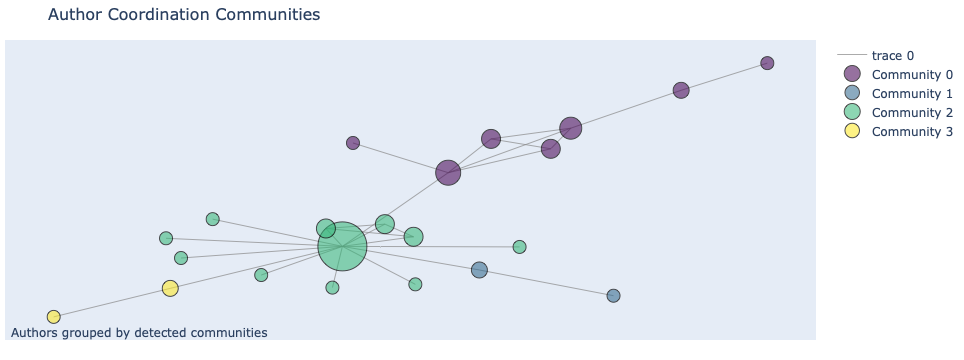


Community Analysis:
Community 0: 7 authors, 9 internal links, 1 external links
Community 1: 2 authors, 1 internal links, 1 external links
Community 2: 11 authors, 13 internal links, 3 external links
Community 3: 2 authors, 1 internal links, 1 external links


In [60]:
# Visualize the graph with community coloring
if partition and target_graph_for_community.number_of_nodes() > 1:
    print("Creating community visualization...")
    
    pos = nx.spring_layout(target_graph_for_community, seed=42)
    
    communities = sorted(set(partition.values()))
    
    import matplotlib.cm as cm
    cmap = cm.get_cmap('viridis', max(3, len(communities)))
    
    # Create traces for each community
    node_traces = []
    
    for comm_id in communities:
        # Get nodes in this community
        comm_nodes = [node for node, comm in partition.items() if comm == comm_id]
        
        # Skip if no nodes in this community
        if not comm_nodes:
            continue
        
        # Extract positions and data for this community
        node_x, node_y = [], []
        node_text = []
        node_size = []
        
        for node in comm_nodes:
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            
            # Prepare hover text
            author_name = G_coord_authors.nodes[node].get('name', str(node))
            conn_count = G_coord_authors.degree(node)
            node_text.append(f"Author: {author_name}<br>Connections: {conn_count}<br>Community: {comm_id}")
            
            # Size by degree
            node_size.append(10 + target_graph_for_community.degree(node) * 3)
        
        # Create trace for this community
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            marker=dict(
                size=node_size,
                color=f'rgba({int(cmap(comm_id)[0]*255)}, {int(cmap(comm_id)[1]*255)}, {int(cmap(comm_id)[2]*255)}, 0.8)',
                line=dict(width=1, color='#000000')
            ),
            text=node_text,
            hoverinfo='text',
            name=f"Community {comm_id}"
        )
        
        node_traces.append(node_trace)
    
    # Create edge trace
    edge_x, edge_y = [], []
    edge_text = []
    
    for source, target, data in target_graph_for_community.edges(data=True):
        x0, y0 = pos[source]
        x1, y1 = pos[target]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        
        # Prepare edge hover text
        weight = data.get('weight', 1)
        sim = data.get('avg_sim', 0)
        source_name = G_coord_authors.nodes[source].get('name', str(source))
        target_name = G_coord_authors.nodes[target].get('name', str(target))
        
        edge_info = f"{source_name} ↔ {target_name}<br>Shared posts: {weight}<br>Avg similarity: {sim:.2f}"
        edge_text.extend([edge_info, edge_info, None])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.7, color='#888888'),
        hoverinfo='text',
        text=edge_text,
        mode='lines'
    )
    
    # Create figure with all traces
    fig = go.Figure(
        data=[edge_trace] + node_traces,
        layout=go.Layout(
            title='Author Coordination Communities',
            titlefont_size=16,
            showlegend=True,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=40),
            annotations=[dict(
                text="Authors grouped by detected communities",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002
            )],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
        )
    )
    
    fig.show()
    
    # Show community summary statistics
    print("\nCommunity Analysis:")
    for comm_id in communities:
        comm_nodes = [node for node, comm in partition.items() if comm == comm_id]
        if comm_nodes:
            # Calculate internal vs external links
            internal_links = sum(1 for u, v in target_graph_for_community.edges() 
                               if partition[u] == comm_id and partition[v] == comm_id)
            
            external_links = sum(1 for u, v in target_graph_for_community.edges() 
                               if (partition[u] == comm_id and partition[v] != comm_id) or
                                  (partition[u] != comm_id and partition[v] == comm_id))
            
            print(f"Community {comm_id}: {len(comm_nodes)} authors, {internal_links} internal links, {external_links} external links")

Preparing network visualization with Plotly...
Calculating layout... This might take a moment for larger graphs.
Layout calculated.
Processing 123 edges for visualization...
Processing 179 nodes for visualization...
Creating Plotly figure...


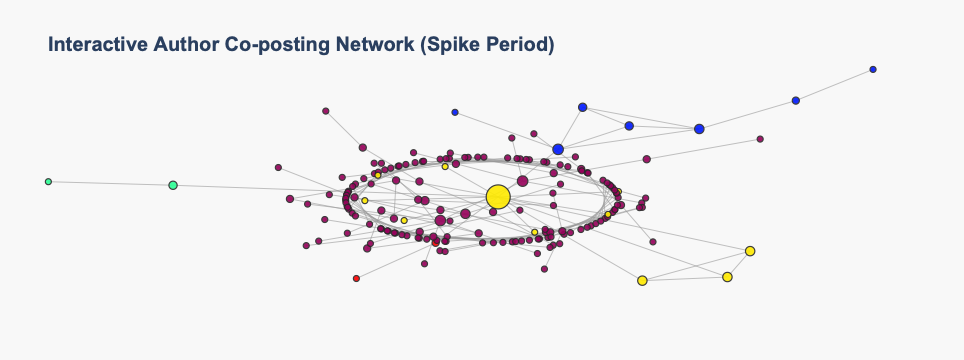

Interactive network visualization saved to: /Users/vanshikwaghela/Projects/TASKS/SimPPL/Trends_viz/output/author_coordination_network_interactive.html


In [61]:
import os 

# Check if G_coord_authors exists and has nodes
if 'G_coord_authors' in locals() and G_coord_authors.number_of_nodes() > 0:
    print("Preparing network visualization with Plotly...")
    
    # Use the full G_coord_authors graph for visualization
    graph_to_plot = G_coord_authors
    
    # Calculate layout
    # Kamada-Kawai can be slow for larger graphs; spring_layout is a good alternative.
    print("Calculating layout... This might take a moment for larger graphs.")
    try:
        # Kamada-Kawai often gives good separation for community structures
        pos = nx.kamada_kawai_layout(graph_to_plot) 
    except Exception as e: 
        print(f"Kamada-Kawai layout failed ({e}), attempting spring_layout...")
        # Spring layout can be sensitive to parameters; k adjusts the optimal distance between nodes
        pos = nx.spring_layout(graph_to_plot, k=0.25, iterations=70, seed=42, weight='avg_sim')
    print("Layout calculated.")

    # --- Create Edges for Plotly --- 
    edge_x, edge_y, edge_hovertext = [], [], []
    print(f"Processing {graph_to_plot.number_of_edges()} edges for visualization...")
    for edge_counter, edge in enumerate(graph_to_plot.edges(data=True)):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        hover_text = f"Authors: {graph_to_plot.nodes[edge[0]].get('label', edge[0])} - {graph_to_plot.nodes[edge[1]].get('label', edge[1])}<br>"
        hover_text += f"Interactions: {edge[2].get('weight',1)}<br>Avg. Similarity: {edge[2].get('avg_sim',0):.3f}"
        edge_hovertext.extend([hover_text, hover_text, ""]) # Apply hover to the segment
        if edge_counter % 1000 == 0 and edge_counter > 0:
            print(f"  Processed {edge_counter} edges...")

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.6, color='#999999'), # Lighter edge color
        hoverinfo='text',
        hovertext=edge_hovertext,
        mode='lines')

    # --- Creating Nodes --- 
    node_x, node_y, node_text, node_color, node_size = [], [], [], [], []
    print(f"Processing {graph_to_plot.number_of_nodes()} nodes for visualization...")
    
    # Calculate degrees for node sizing
    degrees = dict(graph_to_plot.degree(weight='weight')) # Weighted degree
    # Handle cases with no degrees or uniform degrees to prevent division by zero
    min_deg = min(degrees.values()) if degrees else 1
    max_deg = max(degrees.values()) if degrees else 1
    if max_deg == min_deg and max_deg > 1: # If all have same degree > 1
        pass # No scaling needed, or scale differently
    elif max_deg == min_deg: # If all have degree 1 or graph is tiny
        max_deg = min_deg + 1 # Avoid division by zero for scaling

    for node_counter, (node, data) in enumerate(graph_to_plot.nodes(data=True)):
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Node hover text
        text = f"<b>Author:</b> {data.get('label', node)}<br>"
        text += f"<b>Community ID:</b> {data.get('community', 'N/A')}<br>"
        text += f"<b>Community Label:</b> {data.get('community_label', 'Not Labeled')}<br>"
        text += f"<b>Weighted Degree:</b> {degrees.get(node, 0)}"
        node_text.append(text)
        
        # Node color by community ID
        node_color.append(data.get('community', -1)) # Default to -1 if no community
        
        # Node size based on weighted degree
        current_degree = degrees.get(node, min_deg)
        # Scale size: base_size + (normalized_degree * scale_factor)
        size = 6 + ((current_degree - min_deg) / (max_deg - min_deg + 1e-9)) * 18 # +1e-9 to avoid div by zero
        node_size.append(max(4, size)) # Ensure a minimum node size
        if node_counter % 1000 == 0 and node_counter > 0:
            print(f"  Processed {node_counter} nodes...")

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        hoverlabel=dict(bgcolor="white", font_size=12),
        text=node_text,
        marker=dict(
            showscale=False, 
            colorscale='Rainbow', 
            reversescale=False,
            color=node_color,
            size=node_size,
            line=dict(width=1.2, color='rgb(40,40,40)'), # Darker border for nodes
            opacity=0.9
        ))

    # --- Create the Figure --- 
    print("Creating Plotly figure...")
    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='<br><b>Interactive Author Co-posting Network (Spike Period)</b>',
                    titlefont=dict(size=20, family='Arial'),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=10,l=5,r=5,t=50),
                    annotations=[ dict(
                        text="<i>Network of authors posting similar content in short timeframes. Node size by weighted degree. Node color by community. Hover for details.</i>",
                        showarrow=False, xref="paper", yref="paper", x=0.5, y=-0.03, xanchor='center', yanchor='top',
                        font=dict(size=11, family='Arial') ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.1, 1.1]), 
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.1, 1.1]), 
                    paper_bgcolor='rgb(248,248,248)', 
                    plot_bgcolor='rgb(248,248,248)')
                    )
    

    fig.show() 
    
    # Define output path and save
    output_directory = '/Users/vanshikwaghela/Projects/TASKS/SimPPL/Trends_viz/output/'
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Created directory: {output_directory}")
    
    file_name = "author_coordination_network_interactive.html"
    full_output_path = os.path.join(output_directory, file_name)
    try:
        fig.write_html(full_output_path)
        print(f"Interactive network visualization saved to: {full_output_path}")
    except Exception as e:
        print(f"Error saving HTML file: {e}")

else:
    print("Author-Author network (G_coord_authors) is empty or not defined. Skipping Plotly visualization.")
